<a href="https://colab.research.google.com/github/LIvanoff/moscow_clusters/blob/main/moscow_clusters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
import time 

In [ ]:
import pandas as pd

In [ ]:
houses = pd.read_excel('dataset.xlsx')

In [ ]:
houses = houses.drop('district', axis=1)

In [ ]:
latitude_ = houses['latitude'].tolist()
longitude_ = houses['longitude'].tolist()
latlong_ = []
size = int(len(latitude_))
print(size)
for i in range(0, size):
    latlong_.append([longitude_[i],latitude_[i]])
np_latlong_ = np.asarray(latlong_)
print(type(np_latlong_))

36479
<class 'numpy.ndarray'>


In [ ]:
X_ = np.vstack(np_latlong_)

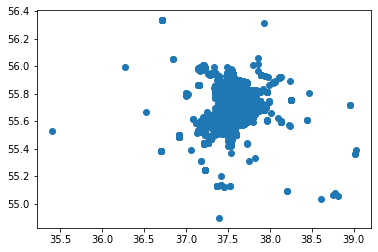

In [ ]:
plt.scatter(X_[:,0],X_[:,1], marker='o')

In [ ]:
count = 0
fail = []
start_time = time.time()
for i in range(1,31465):
    point_ = Point(longitude_[i], latitude_[i])
    polygon_ = Polygon([(35, 54), (35, 56.4), (40, 56.4), (40, 54)])
    if polygon_.contains(point_) == False:
      fail.append([longitude_[i],latitude_[i]])
    count +=1
print("--- %s seconds ---" % (time.time() - start_time))
print(count)

In [ ]:
fail

[]

In [ ]:
df

,address,district,latitude,longitude,apartment,type,AdmArea
0,"Москва, 2-й Очаковский 7",fail,55.683462,37.459360,40,Жилой дом,Западный административный округ (ЗАО)
1,"Москва, 2-й Петра Алексеева пер. 1",fail,55.719221,37.432996,60,Жилой дом,fail
2,"Москва, 2-й Петра Алексеева пер. 5",fail,55.717888,37.429627,768,Жилой дом,fail
3,"Москва, 2-й Сетуньский 11",район Раменки,55.730455,37.530960,143,Жилой дом,Западный административный округ (ЗАО)
4,"Москва, 2-й Сетуньский 13",район Раменки,55.731377,37.532599,84,Жилой дом,Западный административный округ (ЗАО)
...,...,...,...,...,...,...,...
36465,"город Москва, проезд Стратонавтов, дом 9, корп...",район Покровское-Стрешнево,55.826418,37.437371,0,киоск,Северо-Западный административный округ
36466,"Российская Федерация, город Москва, внутригоро...",Алтуфьевский район,55.879402,37.581948,0,киоск,Северо-Восточный административный округ
36467,"город Москва, поселение Сосенское, посёлок Ком...",поселение Сосенское,55.567853,37.486937,0,киоск,Новомосковский административный округ
36468,"Российская Федерация, город Москва, внутригоро...",район Преображенское,55.801777,37.744883,0,киоск,Восточный административный округ


In [ ]:
start_time = time.time()
k_means = KMeans(n_clusters=1500)
moskva = k_means.fit_predict(X_)
print("--- %s seconds ---" % (time.time() - start_time))
plt.figure(figsize=(40, 30), dpi=400)
plt.scatter(X_[:, 0], X_[:, 1], c=moskva,s=0.5)
plt.title('K-Means')
plt.show()

--- 105.55907726287842 seconds ---


In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 4.1 MB/s 
     |████████████████████████████████| 16.7 MB 835 kB/s 
     |████████████████████████████████| 6.3 MB 41.5 MB/s 


In [ ]:
import geopandas as gpd
import json
from shapely.wkt import dumps, loads

In [ ]:
with open("./data.geojson", "r") as file_json:
    study_area = json.load(file_json)
    print(json.dumps(study_area, indent=4))
gdf = gpd.GeoDataFrame.from_features(study_area["features"])
gdf

In [ ]:
geo_houses = pd.read_excel('geo_houses_v2.xlsx')
df_apartment = pd.read_excel('address_v3.xlsx')

In [ ]:
df_apartment.iloc[12]['address']

'Матроса Железняка б-р, 3 корпус 1'

In [ ]:
geo_houses.iloc[124]['address']

'Москва,  Северная линия 13'

In [ ]:
# data = {'address': [], 'apartment': [], 'latitude': [], 'longitude': []}
# df = pd.DataFrame(data)
# apartment = []
# for i in range(0,len(geo_houses)):
#   for j in range(0,len(df_apartment)):
#     if df_apartment.iloc[j]['address'] == geo_houses.iloc[i]['address']:
#       apartment.append(df_apartment.iloc[i]['apartment'])
# geo_houses['apartment'] = apartment

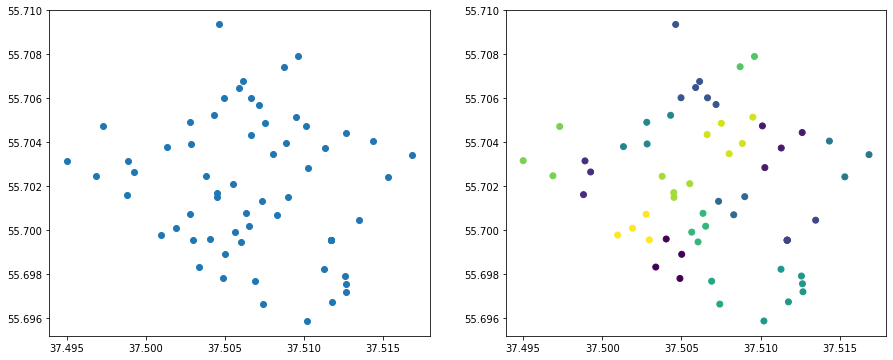

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import json
from sklearn.cluster import KMeans
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
import time
import pandas as pd

df = pd.read_excel('dataset.xlsx')

with open("./data.geojson", "r") as file_json:
    study_area = json.load(file_json)
    #print(json.dumps(study_area, indent=4))

coordinates = []
for i in study_area['features'][0]['geometry']['coordinates'][0]:
    coordinates.append(i)

coordinates.pop(-1)

latlong = []
latitude = df['latitude'].tolist()
longitude = df['longitude'].tolist()
residents = df['apartment'].tolist()
index_list = []
sum_residents = 0

for i in range(1,len(df)):
    point = Point(longitude[i], latitude[i])
    polygon = Polygon(coordinates)
    if polygon.contains(point) == True:
      latlong.append([longitude[i],latitude[i]])
      index_list.append(i)
      if df.loc[i,'type'] == 'Жилой дом':
        sum_residents += residents[i]



np_latlong = np.asarray(latlong)
X = np.vstack(np_latlong)

n_clusters = int(sum_residents/800)
k_means = KMeans(n_clusters)
moskva = k_means.fit_predict(X)

fig, axs = plt.subplots(1, 2, figsize=(15,6))
axs[0].scatter(X[:,0],X[:,1], marker='o')
axs[1].scatter(X[:, 0], X[:, 1], c=moskva)

In [ ]:
sum_residents

10397

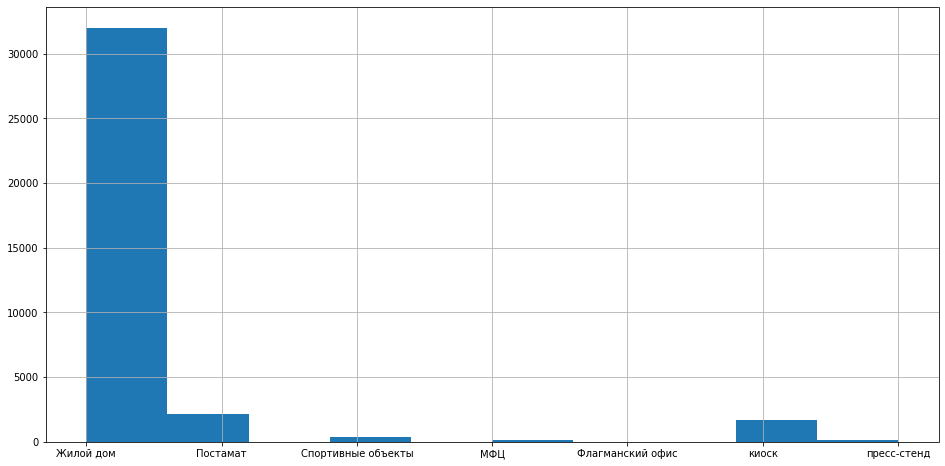

In [ ]:
df['type'].hist(figsize = (16,8))

In [ ]:
num_apartment = []
num_obj = []
med_coverage_per = []
cluster = []
square = []

**Алгоритм**

[1.0, 1.0, 0.9333333333333333, 0.9333333333333333, 1.0]


IndexError: ignored

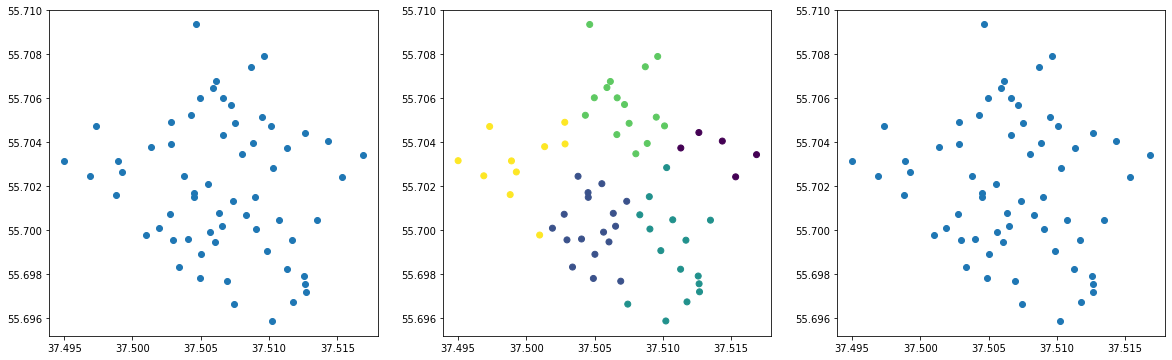

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import json
from sklearn.cluster import KMeans
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
from geopy.distance import great_circle as GC
import time
import pandas as pd
import math

def recommendation(relevant_dict,  filename, clusters):
  df = pd.read_excel('dataset.xlsx')

  with open("./{filename}.geojson".format(filename = filename), "r") as file_json:
      study_area = json.load(file_json)
      #print(json.dumps(study_area, indent=4))
  
  coordinates = []
  for i in study_area['features'][0]['geometry']['coordinates'][0]:
      coordinates.append(i)

  coordinates.pop(-1)

  latlong = []
  latitude = df['latitude'].tolist()
  longitude = df['longitude'].tolist()
  residents = df['apartment'].tolist()
  index_list = []
  sum_residents = 0

  for i in range(1,len(df)):
      point = Point(longitude[i], latitude[i])
      polygon = Polygon(coordinates)
      if polygon.contains(point) == True:
        latlong.append([longitude[i],latitude[i]])
        index_list.append(i)
        if df.loc[i,'type'] == 'Жилой дом':
          sum_residents += residents[i]



  np_latlong = np.asarray(latlong)
  X = np.vstack(np_latlong)


  

  #n_clusters # было раньше int((sum_residents)/1500)
  k_means = KMeans(clusters)
  moskva = k_means.fit_predict(X)

  house_dict = {}
  for i in range(0,k_means.n_clusters):
    house_dict[i] = []
    count = 0
    for j in range(0,len(moskva)):
      if moskva[j] == i:
        count +=1
    house_dict[i].append(count)

  weights = []

  for i in index_list:
    if df.loc[i,'type'] == 'Жилой дом':
      if 40 < df.loc[i,'apartment'] <= 80:
        weights.append(2)
      elif 80 < df.loc[i,'apartment'] <= 160:
        weights.append(3)
      elif df.loc[i,'apartment'] <= 40:
        weights.append(1)
      elif 160 < df.loc[i,'apartment'] <= 160:
        weights.append(3)
      elif df.loc[i,'apartment'] <= 40:
        weights.append(1)
      elif 160 < df.loc[i,'apartment'] <= 200:
        weights.append(4)
      if 200 < df.loc[i,'apartment']:
        weights.append(5)
    elif df.loc[i, 'type'] == 'Постамат':
      weights.append(7)
    elif df.loc[i,'type'] == 'киоск' or df.loc[i,'type'] == 'пресс-стенд':
      weights.append(10)
    elif df.loc[i, 'type'] == 'Спортивный объект':
      weights.append(6)
    elif df.loc[i, 'type'] == 'МФЦ' or df.loc[i, 'type'] == 'Флагманский офис':
      weights.append(8)

  sum_weights = []
  for i in range(0,k_means.n_clusters):
    sum = 0
    for j in range(0, len(index_list)):
      if moskva[j] == i:
        sum += weights[j]
    sum_weights.append(sum)

  latitude_postamate = []
  longitude_postamate = []

  for i in range(0,k_means.n_clusters):
    latitude_sum = 0
    longitude_sum = 0
    for j in range(0, len(index_list)):
      if moskva[j] == i:
        latitude_sum += (weights[j]*latitude[index_list[j]])/sum_weights[i]
        longitude_sum += (weights[j]*longitude[index_list[j]])/sum_weights[i]
    latitude_postamate.append(latitude_sum)
    longitude_postamate.append(longitude_sum)


  new_latlong = []
  for i in range(0,len(longitude_postamate)):
    near_point = 1 # 1 km
    better_long = latitude_postamate[i]
    better_lat = longitude_postamate[i]
    for j in range(0,len(moskva)):
      if moskva[j] == i:
        a = (latitude_postamate[i], longitude_postamate[i])
        b = (latitude[index_list[j]], longitude[index_list[j]])
        if GC(a,b) < near_point:
          near_point = GC(a,b)
          better_lat = latitude[index_list[j]]
          better_long = longitude[index_list[j]]
    latitude_postamate[i] = better_lat
    longitude_postamate[i] = better_long
    new_latlong.append([longitude_postamate[i],latitude_postamate[i]])

  ratings = []

  ######################  ЭТО ДЕЛАЛ ВЛАД #######################################
  ratings = []
  _dict = {}
  for i in range(len(moskva)):
    _dict[str(moskva[i])] = []

  for i in range(0,len(longitude_postamate)):
    for j in range(0,len(moskva)):
      if moskva[j] == i:
        _dict[str(moskva[j])].append(j)

  for z in range(0,len(longitude_postamate)):
    rating = 0.0
    count = 0.0
    for i in range(len(_dict[str(z)])):
      x = latitude[index_list[_dict[str(z)][i]]] * 111
      y = longitude[index_list[_dict[str(z)][i]]] * 71

      x0 = latitude_postamate[z] * 111
      y0 = longitude_postamate[z] * 71

      R = 0.400
      
      if ((x - x0)**2 + (y - y0)**2 <= R**2):
        count += 1
    rating = count / len(_dict[str(z)])
    ratings.append(rating)
  print(ratings)
  ##############################################################################
  sum_rat = math.fsum(ratings)
  sum_rat  /=len(ratings)


  new_np_latlong = np.asarray(new_latlong)
  new_X = np.vstack(new_np_latlong)

  fig, axs = plt.subplots(1, 3, figsize=(20,6))
  axs[0].scatter(X[:, 0], X[:, 1], marker='o')
  axs[1].scatter(X[:, 0], X[:, 1], c=moskva)
  axs[2].scatter(X[:,0],X[:,1], marker='o')
  axs[2].scatter(new_X[:,0],new_X[:,1], marker='o')


if __name__ == '__main__':
  recommendation(relevant_dict={}, filename='data',clusters=5)


In [ ]:
data = {'number place': [],'apartments': [], 'square' : [], 'med coverage per' : [], 'clusters' :[]}
data_for_learning = pd.DataFrame(data)
data_for_learning['number place'] = num_obj
data_for_learning['apartments'] = num_apartment
data_for_learning['square'] = square
data_for_learning['med coverage per'] = med_coverage_per
data_for_learning['clusters'] = cluster
data_for_learning.to_excel('data_for_learning.xlsx')

In [15]:
df_train = pd.read_excel('data_for_learning-3.xlsx')
y_train = np.array(df['clusters'])
X_train = df_train[['number place','apartments','square']].to_numpy()
X_train = np.array(X_train)

In [ ]:
X_train

In [13]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [ ]:
X_test = np.array([])
X_test = np.array(X_test)

In [25]:
ridge = Ridge(alpha=1000).fit(X_train, y_train)

In [ ]:
with open("./msk.geojson", "r") as file_json:
    msk = json.load(file_json)
coor = []

for i in range(0,9):
    for j in msk['features'][i]['geometry']['coordinates'][0]:
        # if i == 1:
        #     print("================================")
        #     # for k in range(0, 5):
        #     print(j)
        #     print("================================")
        
        if i == 2:
          coor.append(j)
        print(i)
        print(j)
        print(i)

In [ ]:
coor

In [ ]:
from shapely.geometry import Polygon
pgon = Polygon(coor) # Assuming the OP's x,y coordinates

print(pgon.area)

0.015873145074255184


In [ ]:
_dict = {}
for i in range(len(moskva)):
  _dict[str(moskva[i])] = []

for i in range(0,len(longitude_postamate)):
  for j in range(0,len(moskva)):
    if moskva[j] == i:
      _dict[str(moskva[j])].append(j)
print(_dict)

{'2': [0, 1, 2, 33], '1': [3, 4, 5, 6, 7, 8, 38, 46, 47, 52, 53], '5': [9, 10, 11, 14, 34, 35, 37, 39, 41, 43], '6': [12, 13, 15, 16, 17, 18, 19, 21, 36], '3': [20, 25, 54, 55, 56, 57, 60, 61], '0': [22, 23, 24, 28, 30, 40, 42, 58], '7': [26, 27, 29, 31, 32, 59], '4': [44, 45, 48, 49, 50, 51]}


In [ ]:
ratings = []
for z in range(0,len(longitude_postamate)):
  rating = 0.0
  count = 0.0
  print('cluster '+str(z))
  print('Postamate = '+str(latitude_postamate[z])+' '+str(longitude_postamate[z]))
  for i in range(len(_dict[str(z)])):
    x = latitude[index_list[_dict[str(z)][i]]] * 111
    y = longitude[index_list[_dict[str(z)][i]]] * 71

    x0 = latitude_postamate[z] * 111
    y0 = longitude_postamate[z] * 71

    R = 0.400
    
    if ((x - x0)**2 + (y - y0)**2 <= R**2):
      count += 1
      print('i = '+str(_dict[str(z)][i]))
      print(str(latitude[index_list[_dict[str(z)][i]]])+'      '+str(longitude[index_list[_dict[str(z)][i]]]))
  rating = count / len(_dict[str(z)])
  ratings.append(rating)
ratings

In [ ]:
with open("./msk.geojson", "r") as file_json:
    msk = json.load(file_json)
    print(json.dumps(msk, indent=4))

msk_coordinates = []
for i in range(0,9):
  for j in msk['features'][i]['geometry']['coordinates'][0]:
      msk_coordinates.append(j)



In [ ]:
coordinates

[[37.493677, 55.703226],
 [37.50874, 55.694471],
 [37.513633, 55.697567],
 [37.51389, 55.700904],
 [37.517667, 55.703395],
 [37.505951, 55.710117]]

In [ ]:
msk_latlong = []
msk_index_list = []
#for j in range(0,9):
for i in range(1,len(df)):
    point = Point(longitude[i], latitude[i])
    polygon = Polygon(coordinates)
    if polygon.contains(point) == True:
      msk_latlong.append([longitude[i],latitude[i]])
      msk_index_list.append(i)

len(msk_latlong )

62